In [1]:
from Functions1 import LoadData
from Functions1 import TestStrategy
from Functions1 import DynamicBacktest
import os
import pandas as pd

In [2]:
current_directory = os.getcwd()
path = os.path.join(current_directory, 'Stocks_financials')

loader = LoadData(path)
prices, financials = loader.Load(start_date='2005-09-01', end_date=None)

Data processed for the following tickers: AAPL, ADM, AMD, CAT, CVX, DUK, GE, GOOGL, GS, HD, JNJ, JPM, KO, META, MSFT, NFLX, NVDA, PLD, SO, T, TRYIY, TSLA, V, VMC, VZ, XOM


In [3]:
offensive_tickers = ["MSFT", "AAPL", "GOOGL", 'V', 'NFLX', 'SO', 'DUK', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE', 'KO', 'JNJ', 'HD', 'AMD', 'ADM', 'META', 'TSLA', 'XOM']   
defensive_tickers = ['ADM', 'AAPL']      
canary_tickers = ['MSFT', 'V', 'NFLX', 'SO', 'DUK', 'PLD', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE',
                      'KO', 'JNJ', 'GS', 'HD', 'AMD', 'ADM', 'META', 'GOOGL', 'TSLA', 'JPM', 'XOM', 'AAPL']    

In [18]:
strategy = TestStrategy(prices, financials, offensive_tickers, defensive_tickers, protective_tickers)
chosen_universe = strategy.run_strategy(start_date='2005-09-01')
chosen_universe.head(8)

,Date,Chosen Universe,Selected Stocks
0,2006-09-01,Defensive,"[ADM, AAPL]"
1,2007-03-01,Offensive,"[CVX, HD, ADM, XOM, MSFT, AAPL, GOOGL, NFLX]"
2,2007-09-01,Offensive,"[DUK, CVX, HD, XOM, ADM, MSFT, AAPL, GOOGL]"
3,2008-03-01,Offensive,"[DUK, CVX, HD, XOM, ADM, MSFT, AAPL, GOOGL]"
4,2008-09-01,Defensive,"[ADM, AAPL]"
5,2009-03-01,Defensive,"[ADM, AAPL]"
6,2009-09-01,Defensive,"[ADM, AAPL]"
7,2010-03-01,Offensive,"[SO, T, CVX, JNJ, ADM, AMD, MSFT, AAPL]"


In [5]:
backtest = DynamicBacktest(chosen_universe, prices, 1000000)
port_values = backtest.get_portfolio_values()
port_values

,Date,Sortino Portfolio Value,Sharpe Portfolio Value,benchmark Portfolio Value
0,2006-09-01,1.000000e+06,1.000000e+06,1.000000e+06
1,2006-09-02,1.000000e+06,1.000000e+06,1.000000e+06
2,2006-09-03,1.000000e+06,1.000000e+06,1.000000e+06
3,2006-09-04,1.000000e+06,1.000000e+06,1.000000e+06
4,2006-09-05,1.023263e+06,1.023263e+06,1.001709e+06
...,...,...,...,...
6611,2024-10-07,1.223240e+07,1.244568e+07,4.308434e+06
6612,2024-10-08,1.234219e+07,1.253862e+07,4.308434e+06
6613,2024-10-09,1.239575e+07,1.258616e+07,4.308434e+06
6614,2024-10-10,1.231103e+07,1.242648e+07,4.308434e+06


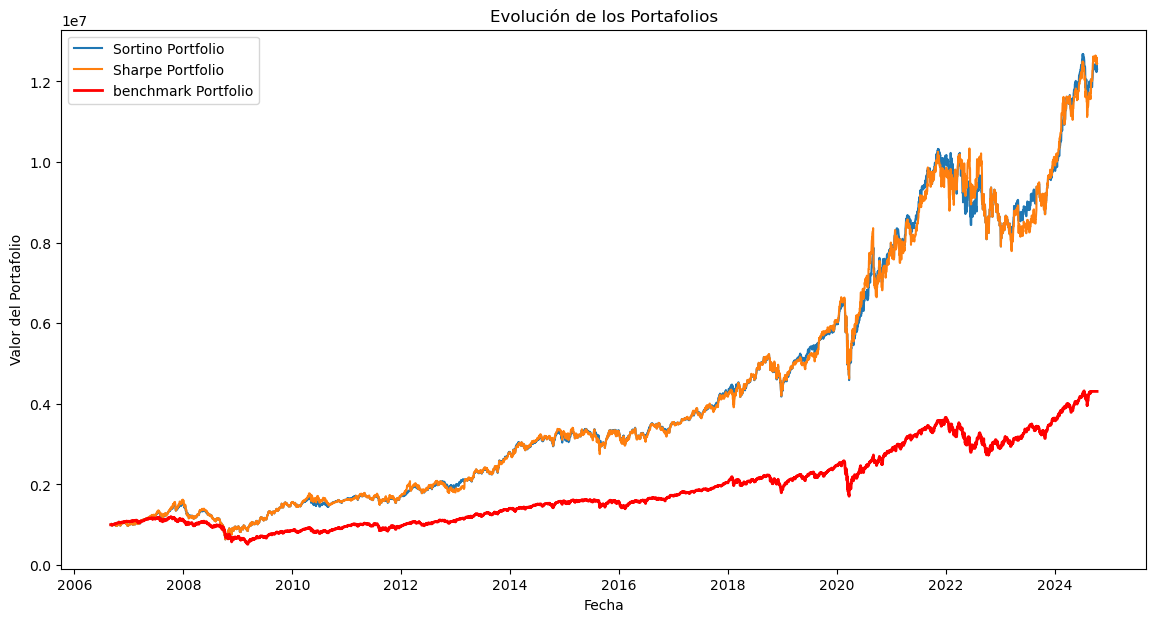

In [6]:
backtest.plot_strategies()

In [7]:
backtest.evaluate_portfolios().T

,Sortino,Sharpe,benchmark
mean_return,0.113875,0.116851,0.069208
CAGR,0.100346,0.100781,0.057209
Sharpe Ratio,0.596951,0.573284,0.420800
Sortino Ratio,0.619442,0.605186,0.422032
Treynor Ratio,0.000464,0.000475,0.000275
Volatility,0.190760,0.203827,0.164469
VaR,-0.017740,-0.018841,-0.015205
Beta,0.973271,0.976588,1.000151
Recovery Time,6610.000000,6610.000000,6610.000000
Tracking Error,0.103922,0.125606,0.000000
